<a href="https://colab.research.google.com/github/soobook/TensorFlow-DL/blob/main/code/TF05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5회차: DNN을 활용한 집값 예측의 모델 구현과 학습

In [ ]:
# 수치 계산을 위한 핵심 라이브러리 (배열, 벡터, 행렬 연산 등)
import numpy as np
# 딥러닝 모델 구축 및 학습을 위한 TensorFlow 프레임워크
import tensorflow as tf
# 데이터 시각화를 위한 라이브러리 (선 그래프, 산점도 등)
import matplotlib.pyplot as plt

# TensorFlow에서 제공하는 Boston 주택 가격 데이터셋 로드
from tensorflow.keras.datasets import boston_housing
# Z-점수 정규화를 위한 전처리 도구 (평균 0, 표준편차 1로 스케일링)
from sklearn.preprocessing import StandardScaler
# 회귀 성능 평가 지표 (평균제곱오차, 평균절대오차 계산용)
from sklearn.metrics import mean_squared_error, mean_absolute_error
# 학습/검증 데이터셋 분할 함수 (train/test 나누기)
from sklearn.model_selection import train_test_split

# 1. Boston Housing 데이터 로드 (이미 train/test로 나뉘어 있음)
(x_train_full, y_train_full), (x_test, y_test) = boston_housing.load_data()

# 2. Z-점수 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_full)
X_test_scaled = scaler.transform(x_test)

# 3. 학습 데이터를 다시 학습/검증으로 분할 (학습:검증 = 80:20)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_scaled, y_train_full, test_size=0.2, random_state=42)

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 위까지 4회차 수업


In [ ]:
X_train.shape

(323, 13)

### 다음부터 5회차 수업

In [ ]:
# 4. DNN 모델 구성 (중간층 3개)
model = tf.keras.models.Sequential([
    # 튜플 형태로 입력 shape 지정
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # 출력층 (회귀)
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

### 활성화 함수 ReLU 데이터 시각화

In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 74.8 MB/s eta 0:00:00


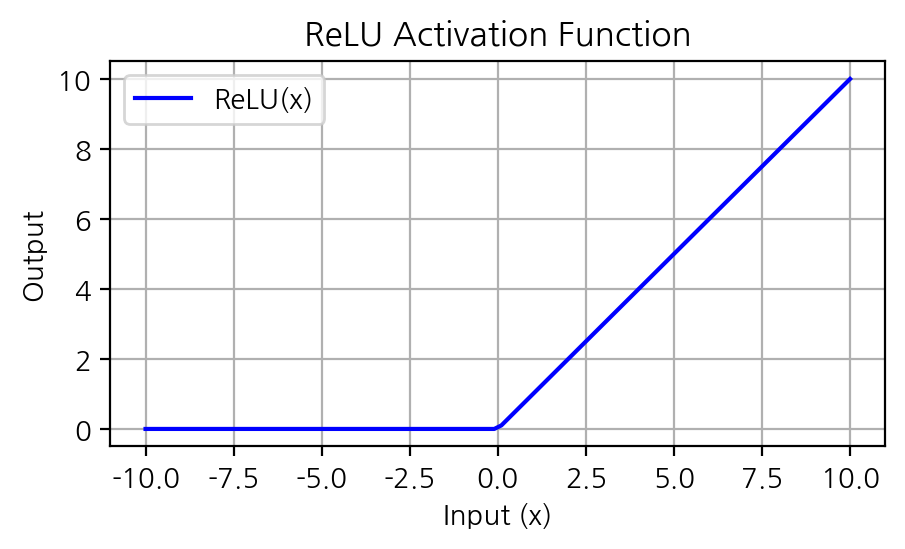

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 입력 값 생성
# -10부터 10까지 총 100개의 값을 균일한 간격으로 생성하는 1차원 배열
x = np.linspace(-10, 10, 100)
y = tf.nn.relu(x)

# 그래프 그리기
plt.figure(figsize=(5, 2.5))
plt.plot(x, y, label='ReLU(x)', color='blue')
plt.title('ReLU Activation Function')
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.show()

### 손실함수와 옵티마이저 설정

In [ ]:
# 5. 컴파일 및 학습
model.compile(optimizer='adam', loss='mse')

### 모델 학습 실행

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 587.2662 - val_loss: 413.2978
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 503.3934 - val_loss: 331.5339
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 399.8462 - val_loss: 211.6086
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 243.1555 - val_loss: 97.4274
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 98.5158 - val_loss: 65.7772
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 75.5053 - val_loss: 43.0418
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 53.8044 - val_loss: 30.3447
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.8493 - val_loss: 22.9983
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 37.5279 - val_loss: 19.7313
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.5161 - val_loss: 17.5155
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.5554 - val_loss: 16.7882
Epoch 12/100
11/11 ━━━━━━━━━━━━━

### 성능 평가

In [ ]:
# 5. 성능 평가 (RMSE, MAE)
y_pred = model.predict(X_test_scaled).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


In [ ]:
# 소숫점 아래 2자리까지만 출력 설정
np.set_printoptions(precision=1, suppress=True)
print(f"정답: {y_test[:10]}") # 앞 부분 10개의 정답 데이터
print(f"예측: {y_pred[:10]}") # 앞 부분 10개의 예측 데이터

정답: [ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]
예측: [10.1 18.6 21.  34.7 24.5 20.8 26.2 21.4 19.3 24.6]


In [ ]:
# 회귀 성능 평가 지표 (평균제곱오차, 평균절대오차 계산용)
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

RMSE: 4.501
MAE: 2.888


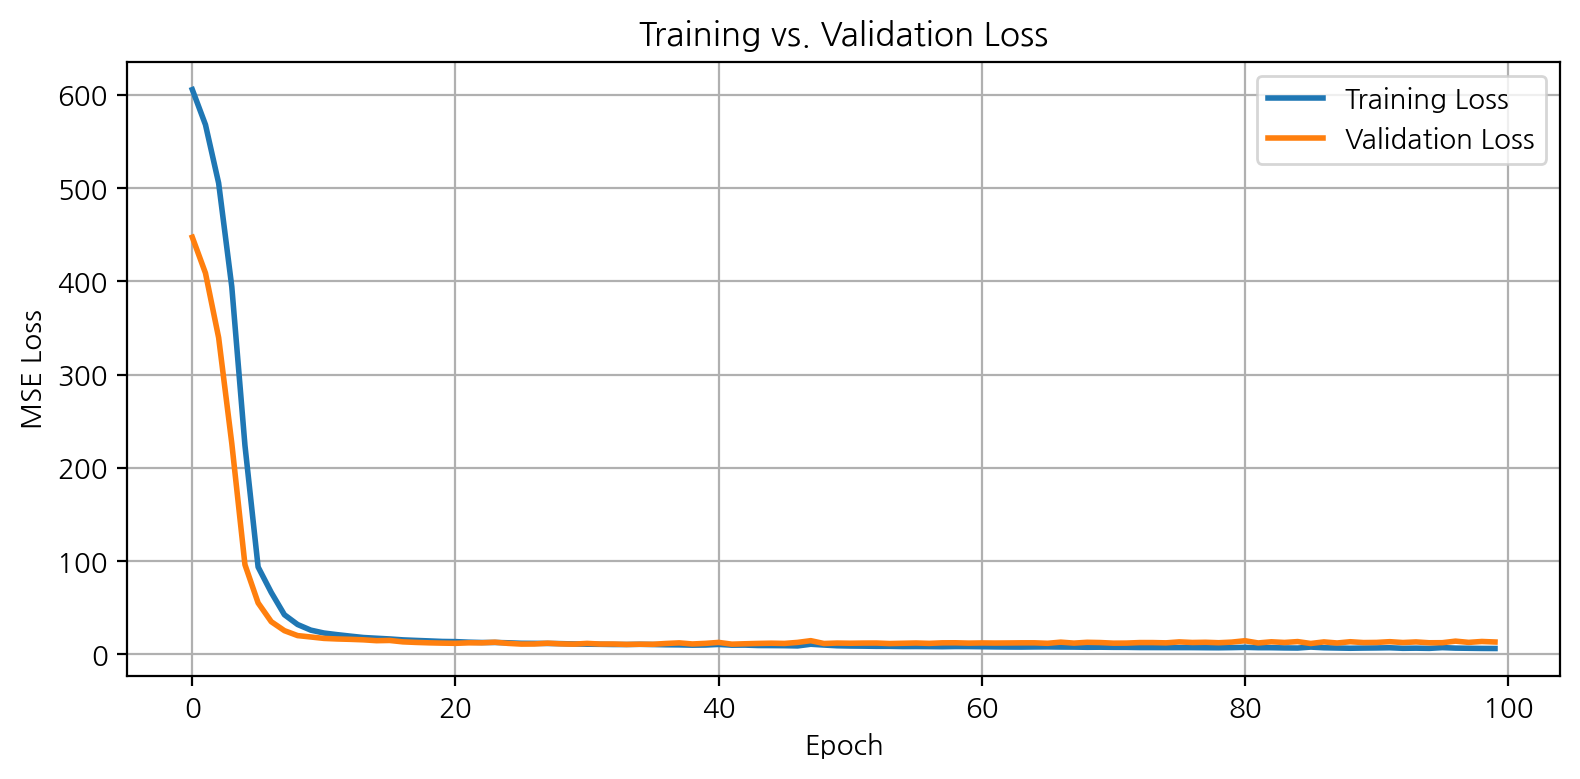

In [ ]:
# 6. 학습/검증 손실 시각화
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

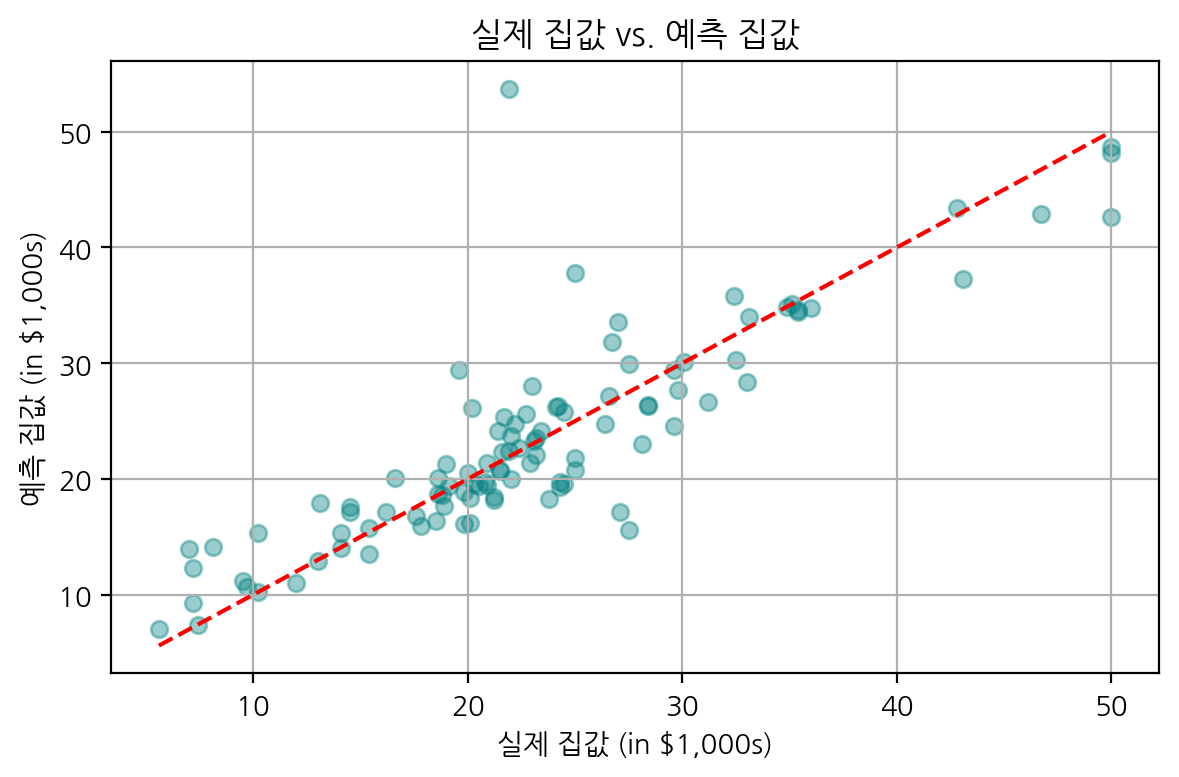

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.4, color='teal')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # y = x 선
plt.xlabel('실제 집값 (in $1,000s)')
plt.ylabel('예측 집값 (in $1,000s)')
plt.title('실제 집값 vs. 예측 집값')
plt.grid(True)
plt.tight_layout()
plt.show()

### 심화 학습

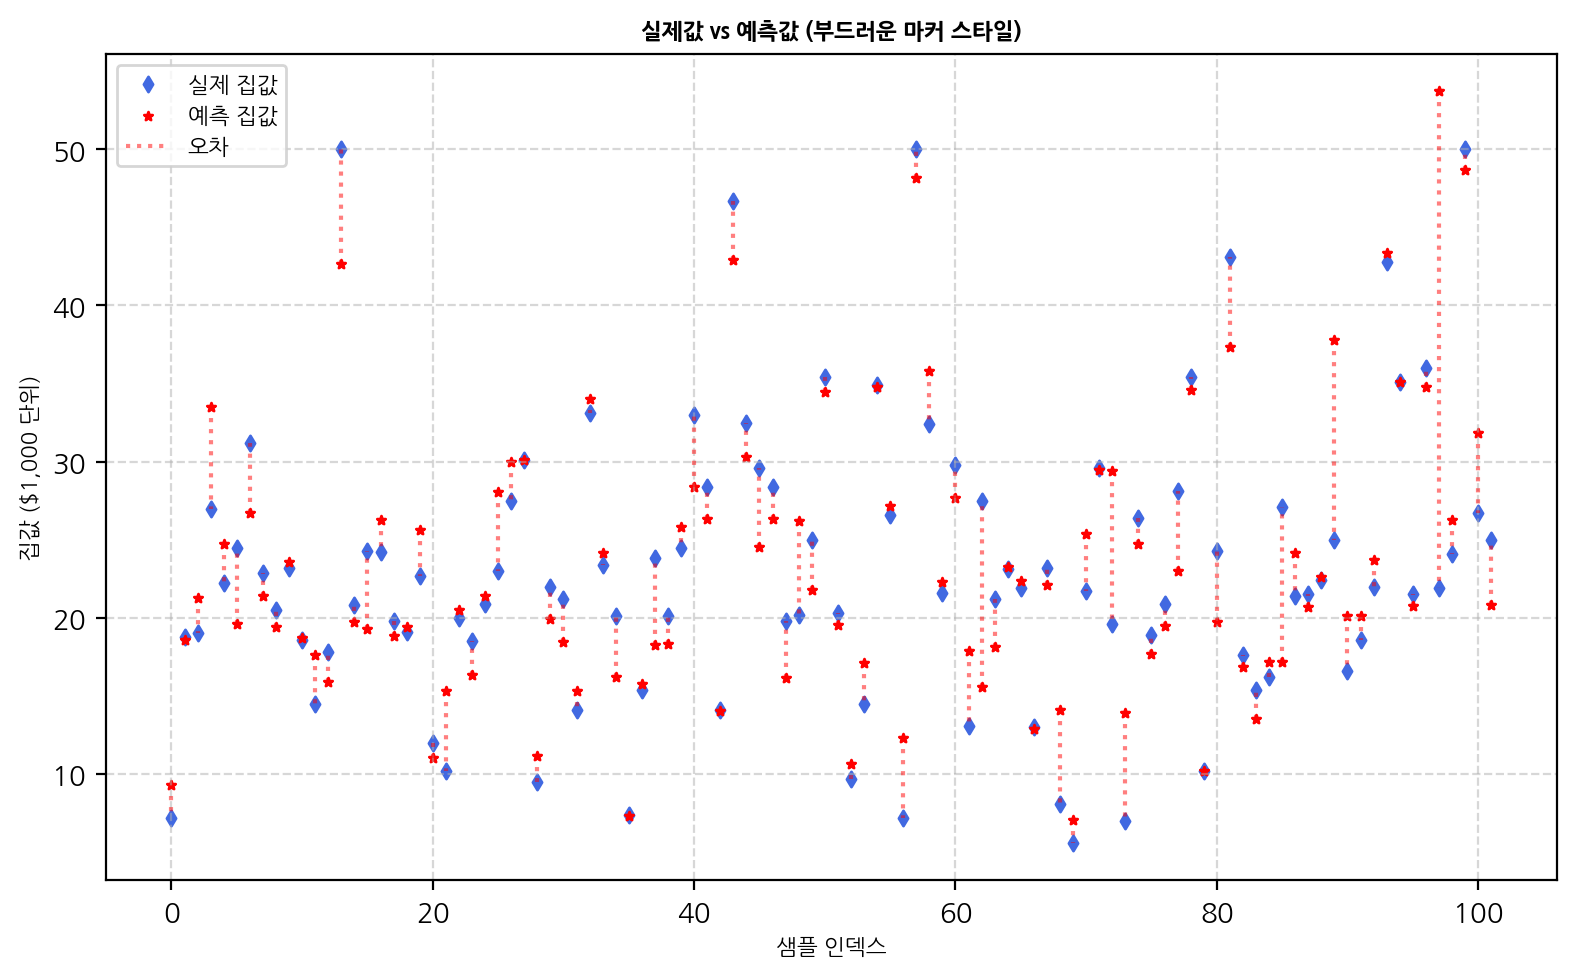

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 오차 계산
errors = np.abs(y_test - y_pred)

# 시각화 시작
plt.figure(figsize=(8, 5))

# 실제값 (다이아몬드 마커, 파란색)
plt.scatter(range(len(y_test)), y_test, label='실제 집값', color='royalblue', marker='d', s=15)

# 예측값 (위쪽 삼각형 마커, 주황색)
plt.scatter(range(len(y_pred)), y_pred, label='예측 집값', color='red', marker='*', s=10)

# 오차 (붉은 점선)
plt.vlines(range(len(y_test)), y_pred, y_test, colors='red', linestyles='dotted', alpha=0.5, label='오차')

# 그래프 설정
plt.xlabel('샘플 인덱스', fontsize=8)
plt.ylabel('집값 ($1,000 단위)', fontsize=8)
plt.title('실제값 vs 예측값 (부드러운 마커 스타일)', fontsize=8, fontweight='bold')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


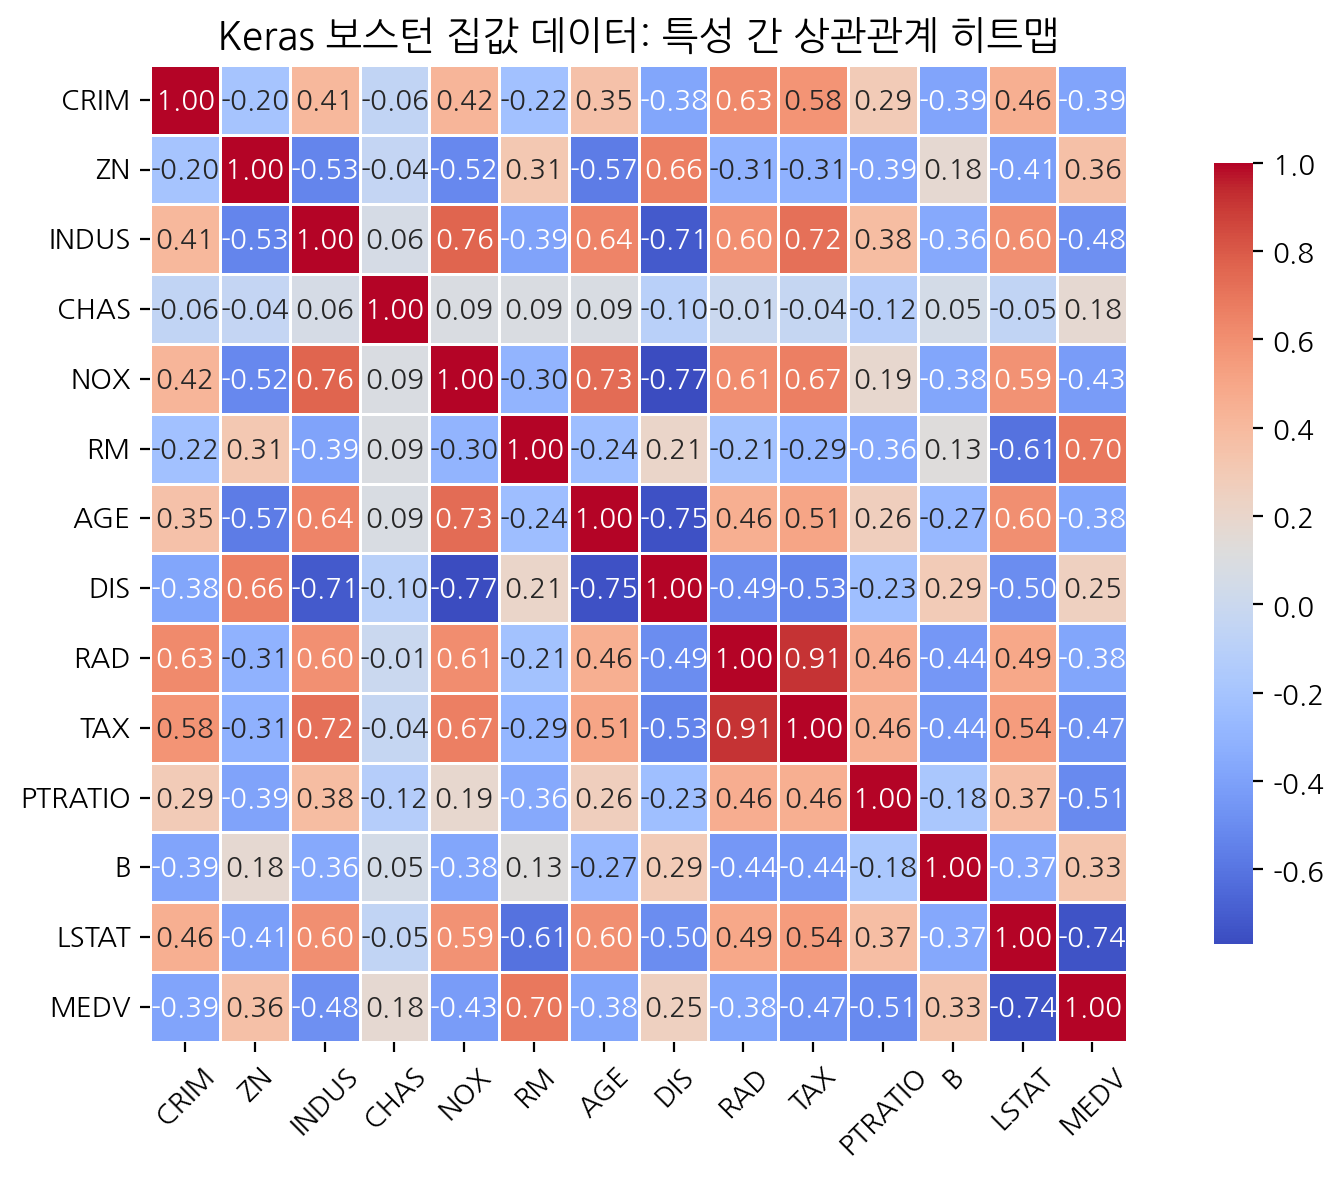

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing

# 1. 데이터 로드 (훈련 + 테스트 합치기)
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
x_all = np.concatenate((x_train, x_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

# 2. 컬럼 이름 정의 (Keras는 feature 이름을 제공하지 않음)
feature_names = [
    'CRIM',   # 범죄율
    'ZN',     # 25,000 평방피트 이상 주거지역 비율
    'INDUS',  # 비소매 상업 지역 비율
    'CHAS',   # 찰스강 인접 여부
    'NOX',    # 일산화질소 농도
    'RM',     # 방 개수
    'AGE',    # 1940년 이전에 지어진 주택 비율
    'DIS',    # 직업센터 거리
    'RAD',    # 고속도로 접근성 지수
    'TAX',    # 재산세율
    'PTRATIO',# 학생-교사 비율
    'B',      # 흑인 인구 비율
    'LSTAT'   # 저소득층 비율
]

# 3. 데이터프레임 생성
df = pd.DataFrame(x_all, columns=feature_names)
df['MEDV'] = y_all  # 타깃 추가

# 4. 상관관계 히트맵
plt.figure(figsize=(9, 6))
sns.heatmap(df.corr(),
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8})

plt.title("Keras 보스턴 집값 데이터: 특성 간 상관관계 히트맵", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 종료